In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import itertools


In [2]:
def make_data(n_samples=800, n_features=8, noise=0.2, random_state=2):
    generator = check_random_state(random_state)

    X = generator.rand(n_samples, n_features)
    y = 10 * (X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 \
        + 10 * X[:, 3] + 10 * X[:, 4] + noise * generator.randn(n_samples)

    return X, y

X,y = make_data()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
rgr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

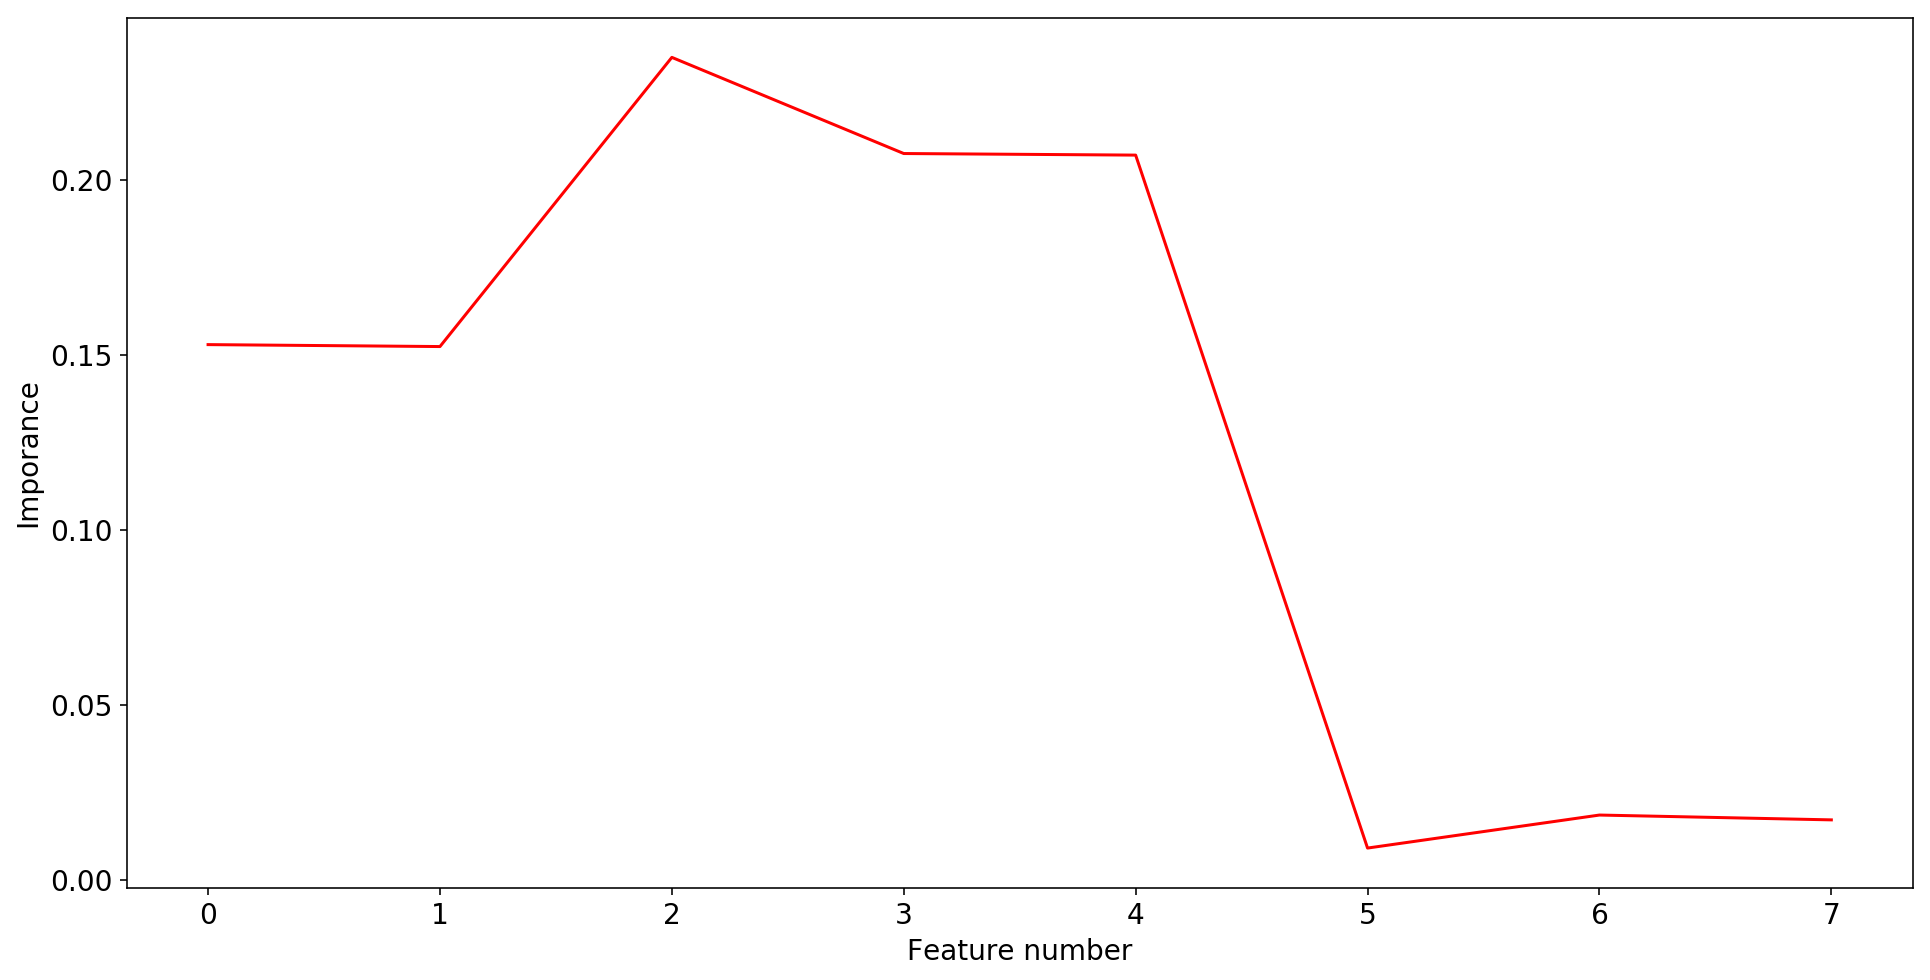

In [4]:
features=range (0, len(rgr.feature_importances_))
plt.plot(features, rgr.feature_importances_, 'r') 
plt.xlabel("Feature number")
plt.ylabel("Imporance")


Features 5,6 and 7 seem to be not important while features 0-4 have the most of imporance

In [5]:
plot_partial_dependence(rgr, X, features=list(itertools.combinations(features, 2)), feature_names=features, figsize=(15, 400) , n_cols=1);

We observe from the figure above that there are various partial dependances between important features (0-4) while there is no dependence between unimportant features (5-7) observed